In [1]:
!pip install numpy pandas matplotlib watermark torch torchvision torchaudio lightning

                                              0.0/2.0 MB ? eta -:--:--
                                              0.0/2.0 MB ? eta -:--:--
                                              0.0/2.0 MB ? eta -:--:--
                                              0.0/2.0 MB ? eta -:--:--
                                              0.0/2.0 MB ? eta -:--:--
     -                                        0.1/2.0 MB 657.6 kB/s eta 0:00:03
     -                                        0.1/2.0 MB 657.6 kB/s eta 0:00:03
     ---                                      0.2/2.0 MB 704.6 kB/s eta 0:00:03
     ---                                      0.2/2.0 MB 845.5 kB/s eta 0:00:03
     ----                                     0.2/2.0 MB 623.6 kB/s eta 0:00:03
     ------                                   0.3/2.0 MB 967.8 kB/s eta 0:00:02
     ------                                   0.3/2.0 MB 967.8 kB/s eta 0:00:02
     ---------                                0.5/2.0 MB 1.1 MB/s eta 0:00:02
     --


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Load dataset

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

train_dataset = datasets.MNIST(
    root="./mnist", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = datasets.MNIST(
    root="./mnist", train=False, transform=transforms.ToTensor()
)

100%|██████████| 9912422/9912422 [00:02<00:00, 3780762.56it/s]


Extracting ./mnist\MNIST\raw\train-images-idx3-ubyte.gz to ./mnist\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 27487110.01it/s]


Extracting ./mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 1974471.76it/s]


Extracting ./mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 5724317.54it/s]


Extracting ./mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist\MNIST\raw



In [3]:
import torch
from torch.utils.data.dataset import random_split

torch.manual_seed(1)
train_dataset, val_dataset = random_split(train_dataset, lengths=[55000, 5000])


In [4]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False,
)

In [5]:
from collections import Counter

train_counter = Counter()
for images, labels in train_loader:
    train_counter.update(labels.tolist())

print(f"\nTraining label distribution:\n{sorted(train_counter.items())}")


val_counter = Counter()
for images, labels in val_loader:
    val_counter.update(labels.tolist())

print(f"\nValidation label distribution:\n{sorted(val_counter.items())}")


test_counter = Counter()
for images, labels in test_loader:
    test_counter.update(labels.tolist())

print(f"\nTest label distribution:\n{sorted(test_counter.items())}")


Training label distribution:
[(0, 5419), (1, 6185), (2, 5477), (3, 5681), (4, 5349), (5, 4974), (6, 5422), (7, 5710), (8, 5351), (9, 5432)]

Validation label distribution:
[(0, 504), (1, 557), (2, 481), (3, 450), (4, 493), (5, 447), (6, 496), (7, 555), (8, 500), (9, 517)]

Test label distribution:
[(0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009)]


### Majority rule classifier

In [6]:
majority_class = test_counter.most_common(1)[0]
print(f"Majority class {majority_class[0]}")

baseline_acc = majority_class[1] / sum(test_counter.values())
print(f"Accuracy when always predicting majority class {baseline_acc:.2f} {baseline_acc * 100:.2f}%")

Majority class 1
Accuracy when always predicting majority class 0.11 11.35%


### Visualization

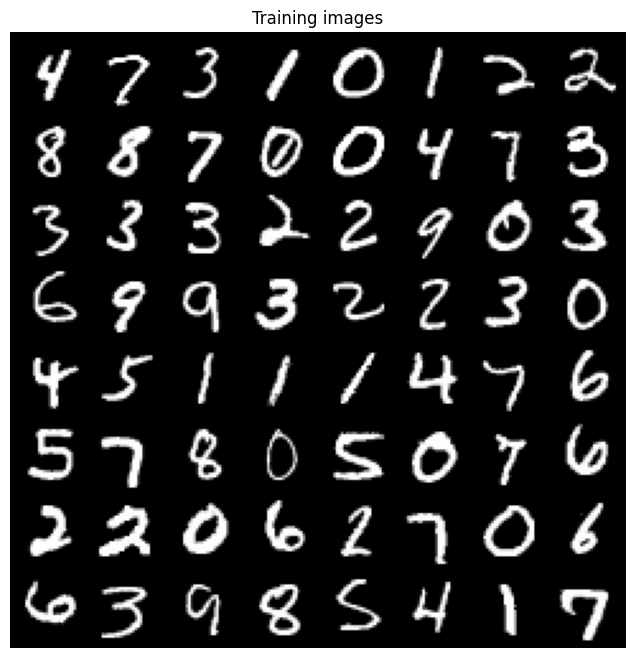

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

for images, labels in train_loader:
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(
    np.transpose(torchvision.utils.make_grid(
        images[:64],
        padding=2,
        normalize=True
    ), (1, 2, 0))
)
plt.show()